# Imports

In [1]:
import os
import numpy as np
# import tensorflow as tf
# import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# from IPython.display import display
# from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from time import strftime

import matplotlib.pyplot as plt

from PIL import Image

# Constans

In [2]:
X_TRAIN_PATH = 'MNIST/digit_xtrain.csv'
X_TEST_PATH = 'MNIST/digit_xtest.csv'
Y_TRAIN_PATH = 'MNIST/digit_ytrain.csv'
Y_TEST_PATH = 'MNIST/digit_ytest.csv'

In [3]:
NR_CLASSES = 10

In [4]:
VALIDATION_SIZE = 10000

In [5]:
IMAGE_WIDTH = 28
IMAGE_HIGHT = 28
CHANNELS = 1
TOTAL_INPUTS = IMAGE_HIGHT * IMAGE_WIDTH * CHANNELS

In [6]:
LOGGING_PATH = 'tenserboard_handwritign_recogonition/'

# Get Data

In [7]:
y_train_all = np.loadtxt(Y_TRAIN_PATH, delimiter=',', dtype=int)

In [8]:
y_test = np.loadtxt(Y_TEST_PATH, delimiter=',', dtype=int)

In [9]:
x_train_all = np.loadtxt(X_TRAIN_PATH, delimiter=',', dtype=int)

In [10]:
x_test = np.loadtxt(X_TEST_PATH, delimiter=',', dtype=int)

# Exploring Data

In [11]:
x_train_all[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [12]:
x_train_all.shape

(60000, 784)

# Data Pre-Processing

### Data Re-Scaleing

In [13]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

### Convert Target Into One-Hot Encoding

In [14]:
#y_train_all = np.eye(NR_CLASSES)[y_train_all]

In [15]:
#y_test = np.eye(NR_CLASSES)[y_test]

### Creating Validation Data

In [16]:
x_val = x_train_all[:VALIDATION_SIZE] # OUR VALIDATION DATASET WITH 10,000 SIZE

In [17]:
y_val = y_train_all[:VALIDATION_SIZE] # OUR VALIDATION DATASET WITH 10,000 SIZE

In [18]:
x_train = x_train_all[VALIDATION_SIZE:] # REMOVE 10,000 (VALIDATION_SIZE) FROM DATASET

In [19]:
y_train = y_train_all[VALIDATION_SIZE:] # REMOVE 10,000 (VALIDATION_SIZE) FROM DATASET

In [20]:
x_train.shape

(50000, 784)

In [21]:
y_val.shape

(10000,)

# Define the Neural Network using Keras

In [22]:
model_1 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),
    Dense(units=512, activation='relu'),
    Dropout(0.25, seed=42),
    Dense(units=64, activation='relu'),
    Dense(10, activation='softmax')
])

In [23]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


# TensorBoard ( Visulation Learning )

In [25]:
def get_TensorBoard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOGGING_PATH, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Seccessfully created directory')
        
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [26]:
samples_per_batch = 1000

In [27]:
y_val.shape


(10000,)

In [28]:
%%time
nr_epochs = 150
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, verbose=0, 
            callbacks=[get_TensorBoard('Model 1')], validation_data=(x_val, y_val))

Seccessfully created directory
CPU times: user 20min 1s, sys: 39.6 s, total: 20min 41s
Wall time: 6min 24s


# Prediction

In [39]:
image = Image.open('MNIST/5.png')
new_image = image.resize((28, 28))
new_image.save('test_resized.png')
img = Image.open('test_resized.png')

bw = img.convert('L')
bw

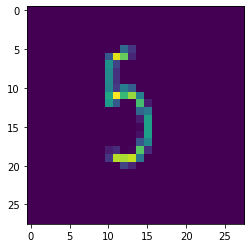

In [40]:
img_array = np.invert(bw)
# img_array = np.invert(bw)

# img_array = np.array([bw])/255


img_array = img_array/255
plt.imshow(img_array )

In [41]:
img_array.shape

(28, 28)

In [42]:
test_img = img_array.ravel()
test_img.shape

(784,)

In [43]:
test = np.expand_dims(test_img, axis=0)
test.shape

(1, 784)

In [44]:
p = model_1.predict_classes(test)
print(f'Prediction: {p}')

Prediction: [5]


# Evaluation

In [35]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0619 - accuracy: 0.9864


In [36]:
!%%bash
!tensorboard --logdir=/home/nachef/Desktop/tp_rdf/tenserboard_handwritign_recogonition

/bin/bash: line 0: fg: no job control
2021-06-23 12:56:14.429511: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-06-23 12:56:14.429559: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [37]:
y_pred=model_1.predict_classes(x_test)
print(confusion_matrix(y_test, y_pred ))

KeyboardInterrupt: 